# Twitter Data Mining With Python

Data mining is an essential tool for developing consumer insights. This guide will demonstrate how social data can be mined and structured into dataframes for further analysis. 

**Situation**: Leverage data mining to support business intelligence: learn more about customers, assess competition, monitor what people are saying about your business. 

**Task**: Pull publicly available Twitter data and structure for analysis. 

**Action**: To accomplish this task I will utilize python and the Tweepy library to access Twitter API and query publicly available data. There are many ways to mine data but each method is dependent on the target social media and programming environment. Alternatively R and the rtweet package could be used to pull data.

### Import Libraries

Just like a carpenter gathers their tools before starting a project we need to set up the environment with the necessary libraries. 

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Connect to Twitter

Twitter API enables users to query tweets, direct messages, users, and other key Twitter resources. To access the API users must apply for developer access then create an application that will generate credentials.

Necessary Credentials:
- API Key
- API Secret Key
- Access Token
- Access Token Secret

In [ ]:
# Define Keys. Note, these key are sensative information and specific to each user/app. 

# Consume:
API_KEY    = '********'
API_KEY_SECRET = '********'

# Access:
ACCESS_TOKEN  = '********'
ACCESS_SECRET_TOKEN = '********'

In [ ]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(API_KEY, API_KEY_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET_TOKEN)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

### Data Extraction

With the Twitter API setup complete we can use it to create an "extractor" object. After this, we will use Tweepy's function extractor.user_timeline(screen_name, count) to extract from screen_name's user the quantity of count tweets. With the extractor and various Tweepy functions we can define the query and set parameters. 

For this example I've selected @fietsprofessor as the user to extra data from. Cycling Professor, @fietsprofessor, is a popular account covering urbanism and bike transit. 


In [ ]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="fietsprofessor", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

5 recent tweets:

At first, we asked @LEGO_Group politely. But now, we have taken it to the streets! Support this project for proper… https://t.co/58eeGR1aRC

If you want high capacity urban streets, this video of #Utrecht by @bicycledutch shows you how to cater for differe… https://t.co/gGRgv2h26G

Don't get distracted by NEWER cars;
What society needs are FEWER cars!

(GoCab by @VanRaamBikes:… https://t.co/Lk4XqkoKLk

Erratum. By: @davewalker

Why people do not cycle? 
Three excuses and one actual reason

(by @davewalker_CT_) https://t.co/WZuBOrfu0p

The code above extracts data into a "tweets'' variable and displays a preview. In order to handle this data we'll construct a pandas DataFrame from "tweets".  

### Creating a DataFrame

A DataFrame allows for easy manipulation and anlysis of the data set. 

In [ ]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

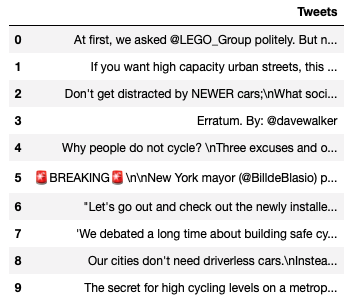

With the DataFrame the data is ordered into a convenient table.  Although for any analysis we'll need more information.

### Adding Relevant Information

Next we'll assess availble metadata and add it to the DataFrame.

In [ ]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']

The above output shows the metadata contained within a single tweet. These attributes can be added to the DataFrame for greater detail. 

In [ ]:
# Add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [ ]:
# Display of first 10 elements from dataframe:
display(data.head(10))

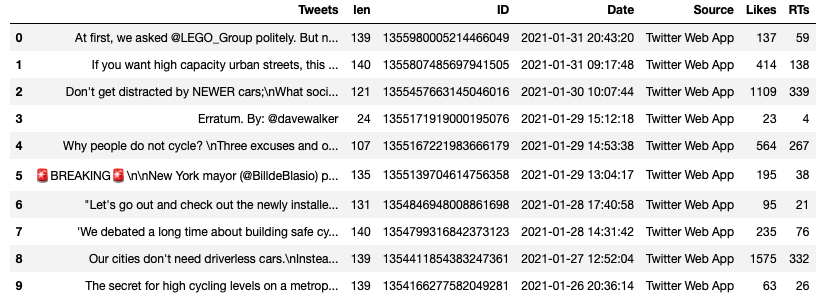

**Results**: Using the described process Twitter data can be easily extracted and formatted into a user friendly table. The final table is a great starting point for further analysis, manipulation, and visualization.   